# An√°lisis de Inclusi√≥n Econ√≥mica: Predicci√≥n de Ingresos (Adult Income Dataset)

## Proyecto: Identificaci√≥n de Barreras Socioecon√≥micas y Oportunidades de Inclusi√≥n

## Introducci√≥n

### üéØ Contexto del Proyecto

Este proyecto aborda la **inclusi√≥n econ√≥mica y social** mediante el an√°lisis del dataset **Adult Income** (UCI ML Repository), que contiene informaci√≥n socioecon√≥mica de m√°s de 32,000 personas.

### üìä Objetivo

Identificar **patrones de desigualdad econ√≥mica** y **barreras de acceso a ingresos altos** (>50K USD/a√±o) para:
- Detectar grupos vulnerables (bajo nivel educativo, sectores de bajos ingresos, brechas de g√©nero)
- Entender factores socioecon√≥micos que limitan el acceso a oportunidades
- Proponer **intervenciones de inclusi√≥n** basadas en datos

### üîç Preguntas Clave

1. ¬øQu√© factores determinan el acceso a ingresos altos?
2. ¬øExisten brechas de g√©nero, edad u ocupaci√≥n?
3. ¬øC√≥mo impacta la educaci√≥n en las oportunidades econ√≥micas?
4. ¬øQu√© grupos requieren programas de inclusi√≥n prioritarios?

### üìà Enfoque: Storytelling con Datos

Cada visualizaci√≥n cuenta una historia sobre **inequidad econ√≥mica** para fundamentar pol√≠ticas de inclusi√≥n social.

### Importaci√≥n de librer√≠as necesarias

In [79]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
from pathlib import Path
sns.set(style="whitegrid")
pd.options.display.max_columns = 150
pd.options.display.width = 200

### Carga de archivos necesarios

In [80]:
# 2. Cargar los archivos
data_dir = Path(r"c:\Users\usuario\Desktop\bcia\somosf5\eda") / "data"
adult_path = data_dir / "adult.csv"

df_adult = pd.read_csv(adult_path, quotechar='"')

print("adult shape:", df_adult.shape)

# ver primeras filas

display(df_adult.head())

adult shape: (32561, 15)


age workclass  fnlwgt     education  education.num marital.status         occupation   relationship   race     sex  capital.gain  capital.loss  hours.per.week native.country income
0   90         ?   77053       HS-grad              9        Widowed                  ?  Not-in-family  White  Female             0          4356              40  United-States  <=50K
1   82   Private  132870       HS-grad              9        Widowed    Exec-managerial  Not-in-family  White  Female             0          4356              18  United-States  <=50K
2   66         ?  186061  Some-college             10        Widowed                  ?      Unmarried  Black  Female             0          4356              40  United-States  <=50K
3   54   Private  140359       7th-8th              4       Divorced  Machine-op-inspct      Unmarried  White  Female             0          3900              40  United-States  <=50K
4   41   Private  264663  Some-college             10      Separated     Prof-specialty      Own-child  White  Female             0          3900              40  United-States  <=50K

### Inspecci√≥n R√°pida: tipos del dato, nulos y valores √∫nicos

In [81]:
# 3. Inspecci√≥n r√°pida: tipos, nulos y valores √∫nicos
def quick_overview(df, name):
    print(f"--- OVERVIEW: {name} ---")
    display(df.info())
    print("\nNulos por columna (top 20):")
    display(df.isna().sum().sort_values(ascending=False).head(20))
    print("\nValores √∫nicos (muestra columnas importantes):")
    for c in df.columns[:20]:
        print(f"{c}: {df[c].nunique()} uniques -> sample: {df[c].dropna().unique()[:6]}")
    print("\n\n")

quick_overview(df_adult, "Adult")

--- OVERVIEW: Adult ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


None


Nulos por columna (top 20):


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


Valores √∫nicos (muestra columnas importantes):
age: 73 uniques -> sample: [90 82 66 54 41 34]
workclass: 9 uniques -> sample: ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc']
fnlwgt: 21648 uniques -> sample: [ 77053 132870 186061 140359 264663 216864]
education: 16 uniques -> sample: ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school']
education.num: 16 uniques -> sample: [ 9 10  4  6 16 15]
marital.status: 7 uniques -> sample: ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent']
occupation: 15 uniques -> sample: ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical']
relationship: 6 uniques -> sample: ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
race: 5 uniques -> sample: ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
sex: 2 uniques -> sample: ['Female' 'Male']
capital.gain: 119 uniques -> sample: [    0 9999

### Normalizaci√≥n de Valores y conversi√≥n de columnas clave

In [82]:
# 4. Limpieza b√°sica: normalizar c√≥digos de 'no responde' y convertir columnas clave
# Reemplazar valores de ausencia habituales ('9','99','999','9999','?','9 ')
no_answer_tokens = {"9","99","999","9999","?","9 ","99 ","999 ","9999 "}
df_adult = df_adult.replace(list(no_answer_tokens), np.nan)

# convertir columnas num√©ricas
df_adult["age"] = pd.to_numeric(df_adult["age"], errors="coerce")
df_adult["hours.per.week"] = pd.to_numeric(df_adult["hours.per.week"], errors="coerce")

# ver resumen despu√©s de limpiar
display(df_adult[["age","hours.per.week"]].describe())

age  hours.per.week
count  32561.000000    32561.000000
mean      38.581647       40.437456
std       13.640433       12.347429
min       17.000000        1.000000
25%       28.000000       40.000000
50%       37.000000       40.000000
75%       48.000000       45.000000
max       90.000000       99.000000

### Visualizaci√≥n de datos preeliminar

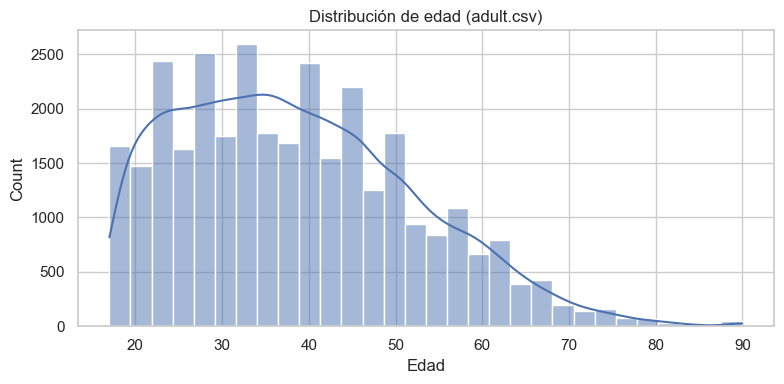

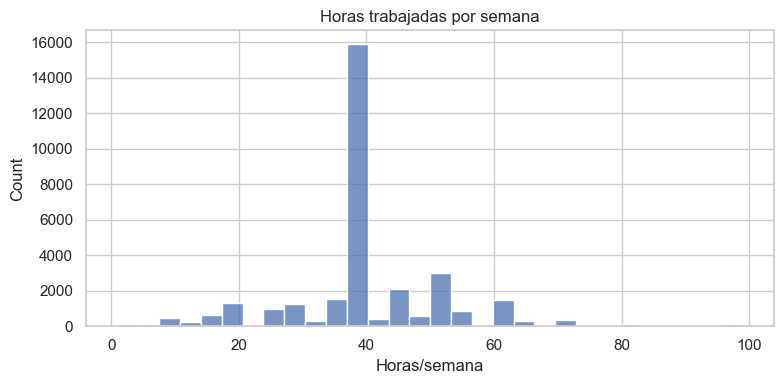

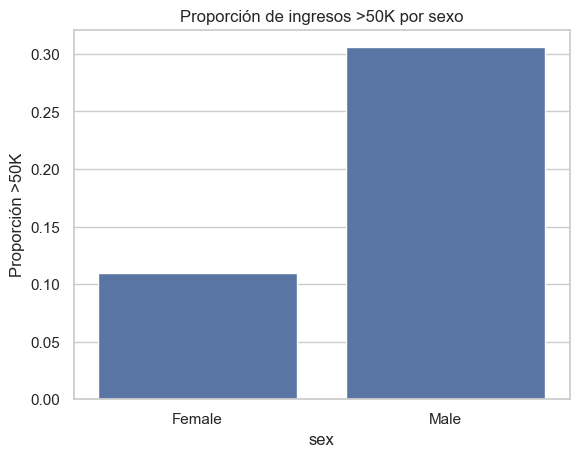

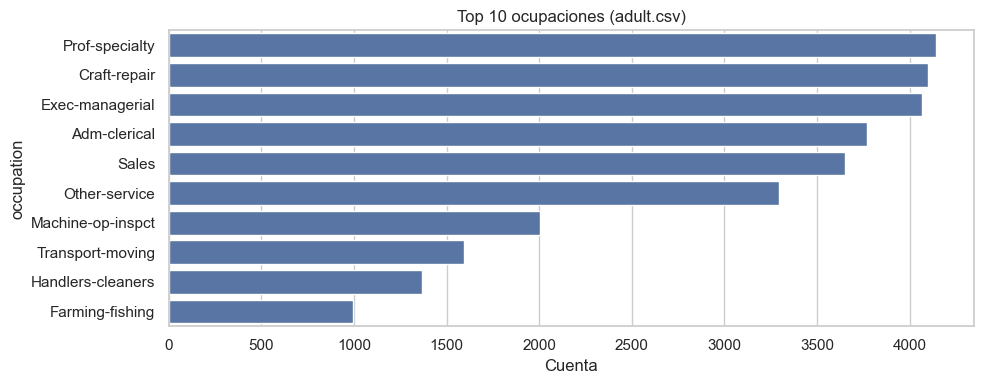

In [83]:
# 5. Visualizaciones ejemplo 
# 5.1 Distribuci√≥n de edad
plt.figure(figsize=(8,4))
sns.histplot(x=df_adult["age"].dropna(), bins=30, kde=True)
plt.title("Distribuci√≥n de edad (adult.csv)")
plt.xlabel("Edad")
plt.tight_layout()
plt.show()

# 5.2 Distribuci√≥n horas por semana
plt.figure(figsize=(8,4))
sns.histplot(x=df_adult["hours.per.week"].dropna(), bins=30)
plt.title("Horas trabajadas por semana")
plt.xlabel("Horas/semana")
plt.tight_layout()
plt.show()

# 5.3 Proporci√≥n de income >50K por sexo
if "sex" in df_adult.columns and "income" in df_adult.columns:
    tmp = df_adult.groupby("sex")["income"].apply(lambda x: (x==">50K").mean()).reset_index(name="pct_over50k")
    sns.barplot(data=tmp, x="sex", y="pct_over50k")
    plt.ylabel("Proporci√≥n >50K")
    plt.title("Proporci√≥n de ingresos >50K por sexo")
    plt.show()

# 5.4 Top ocupaciones (si existe occupation)
if "occupation" in df_adult.columns:
    plt.figure(figsize=(10,4))
    top_occ = df_adult["occupation"].value_counts(dropna=True).head(10)
    sns.barplot(x=top_occ.values, y=top_occ.index)
    plt.title("Top 10 ocupaciones (adult.csv)")
    plt.xlabel("Cuenta")
    plt.tight_layout()
    plt.show()

### Datos faltantes

<Figure size 1000x400 with 0 Axes>

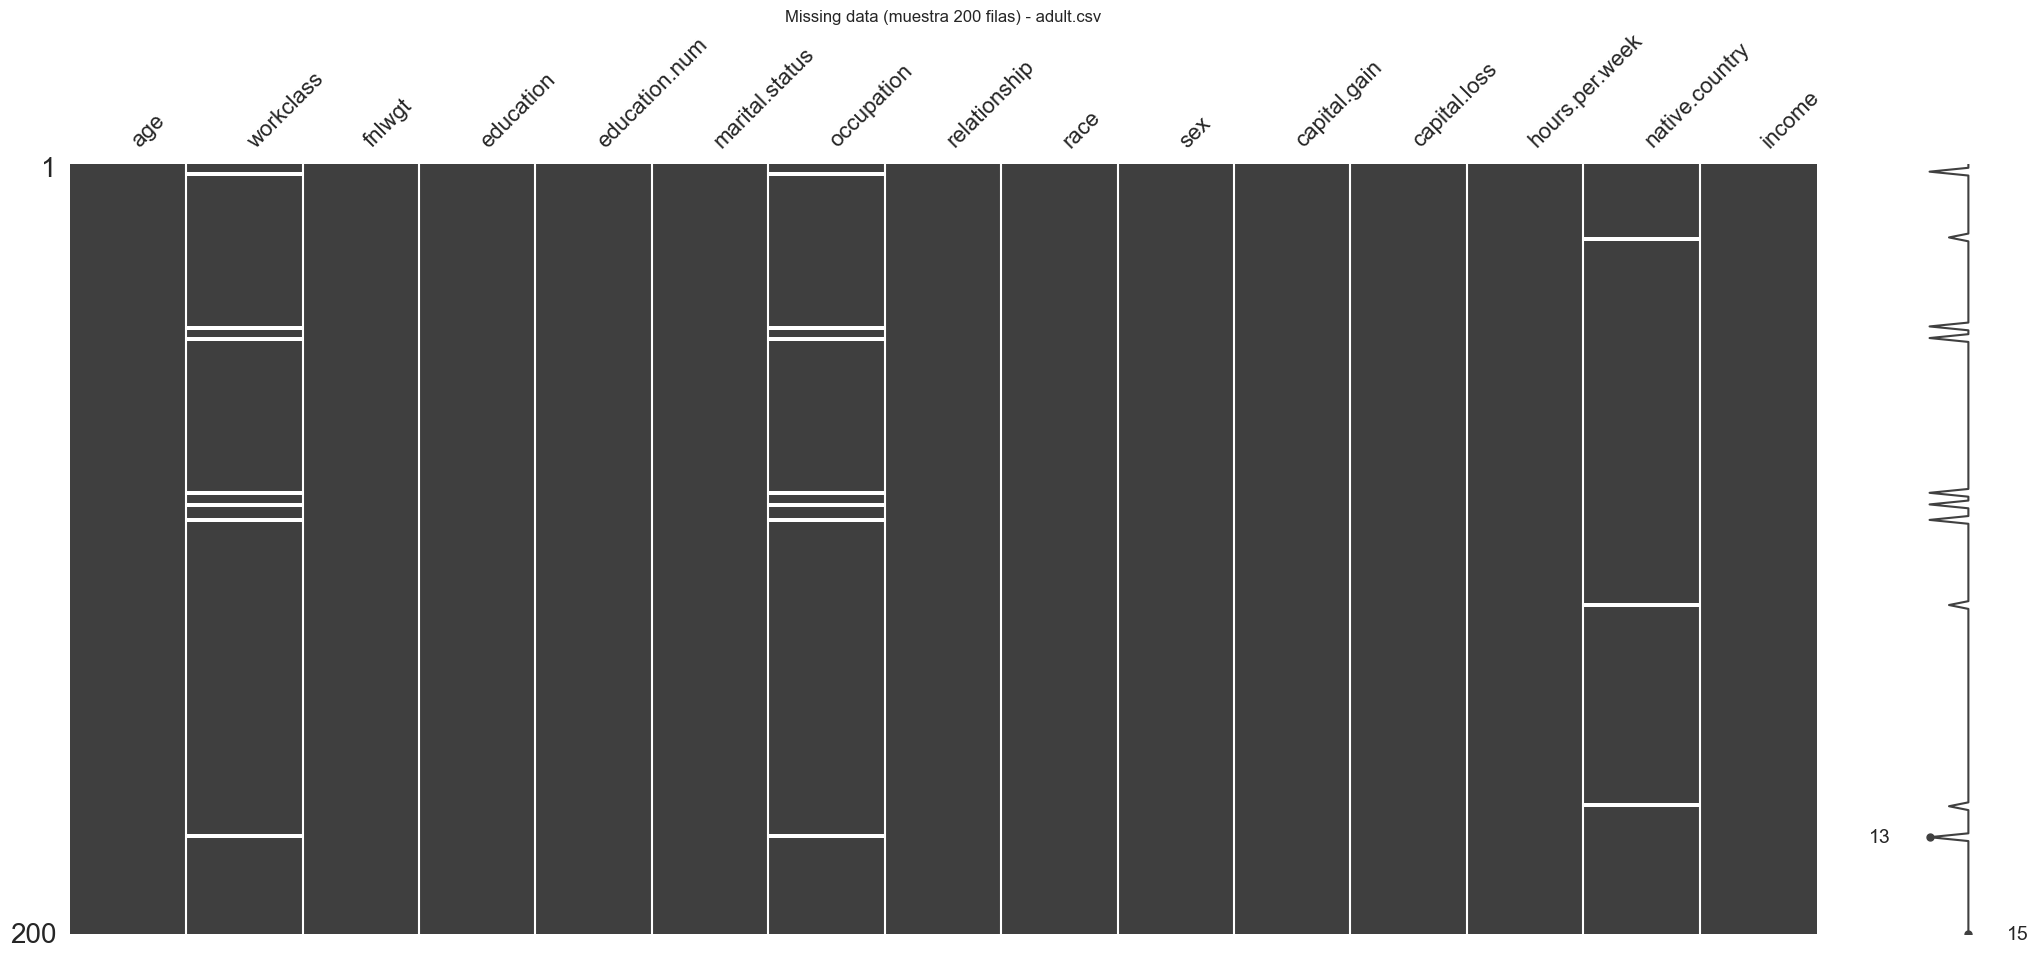

In [84]:
# 7. Missingness visualization (√∫til para storytelling: "qu√© falta en los datos")
plt.figure(figsize=(10,4))
msno.matrix(df_adult.sample(min(200, len(df_adult))))
plt.title("Missing data (muestra 200 filas) - adult.csv")
plt.show()

## Primeras impresiones

### üí° Primeras Impresiones: ¬øPor qu√© es importante la inclusi√≥n econ√≥mica?

El acceso a ingresos dignos no solo se trata de dinero, sino de:
- **Movilidad social**: Capacidad de mejorar condiciones de vida
- **Equidad de oportunidades**: Todos deber√≠an tener acceso a trabajos bien remunerados
- **Desarrollo humano**: Ingresos adecuados permiten acceso a salud, educaci√≥n, vivienda

**El problema**: No todas las personas tienen las mismas oportunidades, incluso con esfuerzo equivalente.

**Nuestro rol**: Usar datos para identificar d√≥nde est√°n las barreras y c√≥mo derribarlas.

In [85]:
# Variables clave en el dataset para an√°lisis de inclusi√≥n econ√≥mica:

print("=" * 70)
print("VARIABLES CLAVE PARA INCLUSI√ìN ECON√ìMICA")
print("=" * 70)

print("\nüìä Variables disponibles en Adult Income Dataset:")
print("\n1. DEMOGR√ÅFICAS:")
print("   - age: Edad de la persona")
print("   - sex: G√©nero (potencial brecha salarial)")
print("   - race: Origen √©tnico")

print("\n2. EDUCATIVAS:")
print("   - education: Nivel educativo alcanzado")
print("   - education_num: A√±os de escolaridad (num√©rico)")

print("\n3. LABORALES:")
print("   - occupation: Tipo de trabajo")
print("   - workclass: Sector (privado, p√∫blico, aut√≥nomo)")
print("   - hours_per_week: Horas trabajadas")

print("\n4. ECON√ìMICAS:")
print("   - income: Variable objetivo (‚â§50K vs >50K USD/a√±o)")
print("   - capital_gain/loss: Ganancias de capital")

print("\n5. CONTEXTUALES:")
print("   - marital_status: Estado civil")
print("   - relationship: Relaci√≥n familiar")
print("   - native_country: Pa√≠s de origen")

print("\nüéØ ENFOQUE DEL AN√ÅLISIS:")
print("   ‚Üí Identificar qu√© factores predicen BAJOS INGRESOS (‚â§50K)")
print("   ‚Üí Detectar grupos en situaci√≥n de vulnerabilidad econ√≥mica")
print("   ‚Üí Proponer intervenciones de inclusi√≥n social basadas en evidencia")
print("=" * 70)

VARIABLES CLAVE PARA INCLUSI√ìN ECON√ìMICA

üìä Variables disponibles en Adult Income Dataset:

1. DEMOGR√ÅFICAS:
   - age: Edad de la persona
   - sex: G√©nero (potencial brecha salarial)
   - race: Origen √©tnico

2. EDUCATIVAS:
   - education: Nivel educativo alcanzado
   - education_num: A√±os de escolaridad (num√©rico)

3. LABORALES:
   - occupation: Tipo de trabajo
   - workclass: Sector (privado, p√∫blico, aut√≥nomo)
   - hours_per_week: Horas trabajadas

4. ECON√ìMICAS:
   - income: Variable objetivo (‚â§50K vs >50K USD/a√±o)
   - capital_gain/loss: Ganancias de capital

5. CONTEXTUALES:
   - marital_status: Estado civil
   - relationship: Relaci√≥n familiar
   - native_country: Pa√≠s de origen

üéØ ENFOQUE DEL AN√ÅLISIS:
   ‚Üí Identificar qu√© factores predicen BAJOS INGRESOS (‚â§50K)
   ‚Üí Detectar grupos en situaci√≥n de vulnerabilidad econ√≥mica
   ‚Üí Proponer intervenciones de inclusi√≥n social basadas en evidencia


# Limpieza de Data

In [86]:
from pathlib import Path
import random
random.seed(42)
pd.options.mode.chained_assignment = None

In [87]:
# trabajar sobre copia
df = df_adult.copy()

### Paso 1: Normalizar nombres de columnas

In [88]:
# 1) Normalizar nombres de columnas
df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace(r'[^0-9a-z]+','_', regex=True)
              .str.strip('_'))

print("Columnas despu√©s de normalizar:")
print(df.columns.tolist())

Columnas despu√©s de normalizar:
['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']


In [89]:
# 2) Convertir columnas num√©ricas a tipo num√©rico
num_cols = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
num_cols = [c for c in num_cols if c in df.columns]

print(f"Convirtiendo {len(num_cols)} columnas num√©ricas: {num_cols}")

for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')
    
print("\nTipos de datos despu√©s de conversi√≥n:")
display(df[num_cols].dtypes)

Convirtiendo 6 columnas num√©ricas: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

Tipos de datos despu√©s de conversi√≥n:


age               int64
fnlwgt            int64
education_num     int64
capital_gain      int64
capital_loss      int64
hours_per_week    int64
dtype: object

### Paso 2: Convertir columnas num√©ricas

AN√ÅLISIS DE VALORES NULOS


columna  nulos  porcentaje
occupation          occupation   1843        5.66
workclass            workclass   1836        5.64
native_country  native_country    583        1.79

C:\Users\usuario\AppData\Local\Temp\ipykernel_8196\2483409002.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_missing, x='porcentaje', y='columna', palette='viridis')


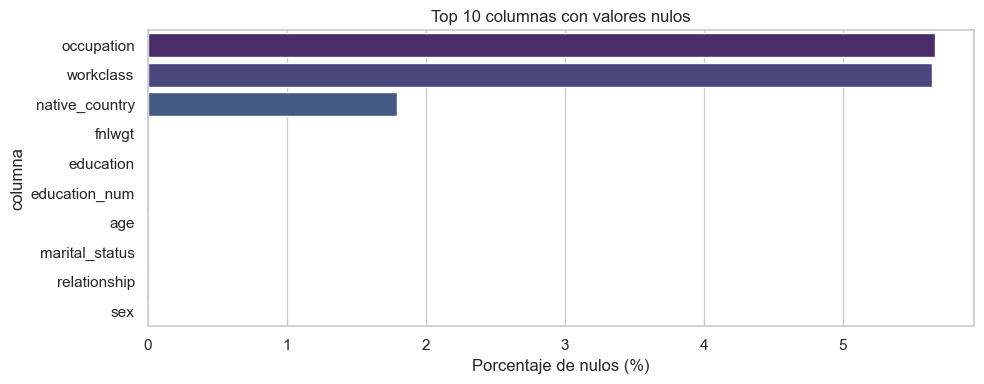

In [90]:
# 3) An√°lisis de valores nulos
print("=" * 60)
print("AN√ÅLISIS DE VALORES NULOS")
print("=" * 60)

missing_info = pd.DataFrame({
    'columna': df.columns,
    'nulos': df.isna().sum(),
    'porcentaje': (df.isna().mean() * 100).round(2)
}).sort_values('porcentaje', ascending=False)

display(missing_info[missing_info['nulos'] > 0])

# Visualizaci√≥n
plt.figure(figsize=(10, 4))
top_missing = missing_info.head(10)
sns.barplot(data=top_missing, x='porcentaje', y='columna', palette='viridis')
plt.title('Top 10 columnas con valores nulos')
plt.xlabel('Porcentaje de nulos (%)')
plt.tight_layout()
plt.show()

### Paso 4: Tratamiento especial de 'occupation' (columna clave para inclusi√≥n)

In [91]:
# 4) Tratamiento de 'occupation' - columna importante para an√°lisis de inclusi√≥n
print("=" * 60)
print("TRATAMIENTO DE OCCUPATION")
print("=" * 60)

print(f"\nOccupation - % missing: {df['occupation'].isna().mean()*100:.2f}%")
print(f"Valores √∫nicos: {df['occupation'].nunique()}")

# Ver distribuci√≥n
print("\nTop 10 ocupaciones:")
display(df['occupation'].value_counts(dropna=False).head(10))

# 1) Crear indicador de missing (preserva informaci√≥n de ausencia)
df['occupation_missing'] = df['occupation'].isna().astype(int)
print(f"\nIndicador de missing creado: {df['occupation_missing'].sum()} casos sin ocupaci√≥n")

# 2) Imputar con 'Unknown' 
df['occupation'] = df['occupation'].fillna('Unknown')

# 3) Normalizar y agrupar en categor√≠as amplias (√∫til para modelado)
occ_map = {
    'exec-managerial': 'Management',
    'prof-specialty': 'Professional',
    'tech-support': 'Technical',
    'craft-repair': 'Skilled-labor',
    'machine-op-inspct': 'Skilled-labor',
    'transport-moving': 'Skilled-labor',
    'adm-clerical': 'Clerical',
    'sales': 'Sales',
    'other-service': 'Service',
    'priv-house-serv': 'Service',
    'handlers-cleaners': 'Manual',
    'armed-forces': 'Military',
    'farming-fishing': 'Manual',
    'protective-serv': 'Military',
    'unknown': 'Unknown'
}

# Normalizar nombres
df['occupation_norm'] = (df['occupation']
                         .str.strip()
                         .str.lower()
                         .str.replace(r'[^0-9a-z\-]+', '_', regex=True)
                         .str.replace('_', '-'))

# Mapear a grupos
df['occ_group'] = df['occupation_norm'].map(occ_map).fillna('Other')

print("\nDistribuci√≥n por grupos de ocupaci√≥n:")
display(df['occ_group'].value_counts())

# 4) Crear feature de frecuencia (encoding √∫til para modelos)
occ_freq = df['occ_group'].value_counts(normalize=True)
df['occ_freq'] = df['occ_group'].map(occ_freq)

print("\nSample de features creadas:")
display(df[['occupation', 'occ_group', 'occupation_missing', 'occ_freq']].head(10))

TRATAMIENTO DE OCCUPATION

Occupation - % missing: 5.66%
Valores √∫nicos: 14

Top 10 ocupaciones:


occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
NaN                  1843
Transport-moving     1597
Handlers-cleaners    1370
Name: count, dtype: int64


Indicador de missing creado: 1843 casos sin ocupaci√≥n

Distribuci√≥n por grupos de ocupaci√≥n:

Distribuci√≥n por grupos de ocupaci√≥n:


occ_group
Skilled-labor    7698
Professional     4140
Management       4066
Clerical         3770
Sales            3650
Service          3444
Manual           2364
Unknown          1843
Technical         928
Military          658
Name: count, dtype: int64


Sample de features creadas:


occupation      occ_group  occupation_missing  occ_freq
0            Unknown        Unknown                   1  0.056601
1    Exec-managerial     Management                   0  0.124873
2            Unknown        Unknown                   1  0.056601
3  Machine-op-inspct  Skilled-labor                   0  0.236418
4     Prof-specialty   Professional                   0  0.127146
5      Other-service        Service                   0  0.105771
6       Adm-clerical       Clerical                   0  0.115783
7     Prof-specialty   Professional                   0  0.127146
8     Prof-specialty   Professional                   0  0.127146
9       Craft-repair  Skilled-labor                   0  0.236418

### Paso 5: Imputaci√≥n de valores nulos (otras columnas)

### Paso 3: An√°lisis de valores nulos

In [92]:
# 5) Imputaci√≥n de valores nulos para el resto de columnas
print("=" * 60)
print("IMPUTACI√ìN DE VALORES NULOS")
print("=" * 60)

# Columnas num√©ricas ya definidas - imputar con mediana
print("\n[Num√©ricas] Imputando con mediana:")
for c in num_cols:
    if c in df.columns:
        n_missing = df[c].isna().sum()
        if n_missing > 0:
            med = df[c].median()
            df[c].fillna(med, inplace=True)
            print(f"  {c}: {n_missing} valores ‚Üí mediana = {med:.2f}")

# Columnas categ√≥ricas - imputar con 'Unknown'
# Excluir: income (target), occupation (ya tratada), y features generadas
exclude_cols = {'income', 'occupation', 'occupation_norm', 'occ_group', 
                'occupation_missing', 'occ_freq'}

cat_cols = [c for c in df.select_dtypes(include='object').columns 
            if c not in exclude_cols]

print(f"\n[Categ√≥ricas] Imputando con 'Unknown' en {len(cat_cols)} columnas:")
for c in cat_cols:
    n_missing = df[c].isna().sum()
    if n_missing > 0:
        df[c].fillna('Unknown', inplace=True)
        print(f"  {c}: {n_missing} valores ‚Üí 'Unknown'")

# Verificar que no quedan nulos (excepto si se eliminaron columnas)
print("\n" + "=" * 60)
remaining_nulls = df.isna().sum().sum()
print(f"Total de valores nulos restantes: {remaining_nulls}")
if remaining_nulls > 0:
    print("‚ö†Ô∏è A√∫n hay valores nulos en:")
    display(df.isna().sum()[df.isna().sum() > 0])

IMPUTACI√ìN DE VALORES NULOS

[Num√©ricas] Imputando con mediana:

[Categ√≥ricas] Imputando con 'Unknown' en 7 columnas:
  workclass: 1836 valores ‚Üí 'Unknown'
  native_country: 583 valores ‚Üí 'Unknown'

Total de valores nulos restantes: 0
  workclass: 1836 valores ‚Üí 'Unknown'
  native_country: 583 valores ‚Üí 'Unknown'

Total de valores nulos restantes: 0


C:\Users\usuario\AppData\Local\Temp\ipykernel_8196\2735002489.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna('Unknown', inplace=True)


### Paso 6: Crear variable target (income_bin)

In [93]:
# 6) Crear variable target binaria
print("=" * 60)
print("CREACI√ìN DE VARIABLE TARGET")
print("=" * 60)

if 'income' in df.columns:
    # Ver distribuci√≥n original
    print("\nDistribuci√≥n original de income:")
    display(df['income'].value_counts())
    
    # Crear variable binaria
    df['income_bin'] = df['income'].str.strip().map({'>50K': 1, '<=50K': 0})
    
    # Verificar mapeo
    print("\nDistribuci√≥n de income_bin:")
    display(df['income_bin'].value_counts())
    print(f"Proporci√≥n de >50K: {df['income_bin'].mean():.2%}")
    
    # Eliminar filas sin target v√°lido
    n_before = len(df)
    df = df[df['income_bin'].notna()].copy()
    n_removed = n_before - len(df)
    
    if n_removed > 0:
        print(f"\n‚ö†Ô∏è Filas sin target v√°lido eliminadas: {n_removed}")
    
    # Eliminar columna original
    df.drop(columns=['income'], inplace=True)
    print("\n‚úì Variable target 'income_bin' creada correctamente")
else:
    print("‚ö†Ô∏è Columna 'income' no encontrada")

CREACI√ìN DE VARIABLE TARGET

Distribuci√≥n original de income:


income
<=50K    24720
>50K      7841
Name: count, dtype: int64


Distribuci√≥n de income_bin:


income_bin
0    24720
1     7841
Name: count, dtype: int64

Proporci√≥n de >50K: 24.08%

‚úì Variable target 'income_bin' creada correctamente


### Paso 7: Eliminar duplicados

In [94]:
# 7) Eliminar duplicados
print("=" * 60)
print("ELIMINACI√ìN DE DUPLICADOS")
print("=" * 60)

n_dup = df.duplicated().sum()
print(f"\nFilas duplicadas encontradas: {n_dup}")

if n_dup > 0:
    df.drop_duplicates(inplace=True)
    print(f"‚úì {n_dup} filas duplicadas eliminadas")
else:
    print("‚úì No hay filas duplicadas")
    
print(f"\nShape actual del dataset: {df.shape}")

ELIMINACI√ìN DE DUPLICADOS

Filas duplicadas encontradas: 24
‚úì 24 filas duplicadas eliminadas

Shape actual del dataset: (32537, 19)


### Paso 8: Selecci√≥n de columnas para modelado

In [95]:
# 8) Selecci√≥n de columnas para modelado
print("=" * 60)
print("SELECCI√ìN DE COLUMNAS PARA MODELADO")
print("=" * 60)

# Columnas a eliminar (no √∫tiles para predicci√≥n)
# fnlwgt: peso de muestreo, no tiene valor predictivo directo
# occupation: ya creamos occ_group que es m√°s √∫til
# occupation_norm: variable intermedia
cols_to_drop = ['fnlwgt', 'occupation', 'occupation_norm']
cols_to_drop = [c for c in cols_to_drop if c in df.columns]

if cols_to_drop:
    print(f"\nEliminando columnas no √∫tiles para modelado: {cols_to_drop}")
    df.drop(columns=cols_to_drop, inplace=True)

print(f"\n‚úì Dataset limpio - shape: {df.shape}")
print(f"\nColumnas finales ({len(df.columns)}):")
print(df.columns.tolist())

# Resumen de tipos
print("\nTipos de datos:")
display(df.dtypes.value_counts())

SELECCI√ìN DE COLUMNAS PARA MODELADO

Eliminando columnas no √∫tiles para modelado: ['fnlwgt', 'occupation', 'occupation_norm']

‚úì Dataset limpio - shape: (32537, 16)

Columnas finales (16):
['age', 'workclass', 'education', 'education_num', 'marital_status', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'occupation_missing', 'occ_group', 'occ_freq', 'income_bin']

Tipos de datos:


object     8
int64      7
float64    1
Name: count, dtype: int64

### Paso 9: Crear dataset para modelado (con one-hot encoding)

In [96]:
# 9) Crear versi√≥n para modelado con one-hot encoding
print("=" * 60)
print("PREPARACI√ìN FINAL PARA MODELADO")
print("=" * 60)

# Identificar columnas categ√≥ricas a codificar
# Excluir: target (income_bin), features num√©ricas ya creadas, indicadores
exclude_from_encoding = {'income_bin', 'occupation_missing', 'occ_freq'}

cat_cols_to_encode = [c for c in df.select_dtypes(include='object').columns 
                      if c not in exclude_from_encoding]

print(f"\nColumnas categ√≥ricas a codificar ({len(cat_cols_to_encode)}):")
for col in cat_cols_to_encode:
    print(f"  - {col}: {df[col].nunique()} categor√≠as")

# Crear dataset con one-hot encoding
print("\nAplicando one-hot encoding...")
df_model = pd.get_dummies(df, columns=cat_cols_to_encode, drop_first=True)

print(f"\n‚úì Dataset de modelado creado")
print(f"  Shape original: {df.shape}")
print(f"  Shape con encoding: {df_model.shape}")
print(f"  Nuevas features creadas: {df_model.shape[1] - df.shape[1]}")

# Verificar tipos finales
print(f"\nTipos de datos finales:")
display(df_model.dtypes.value_counts())

# Mostrar sample
print("\nSample de datos finales:")
display(df_model.head())

PREPARACI√ìN FINAL PARA MODELADO

Columnas categ√≥ricas a codificar (8):
  - workclass: 9 categor√≠as
  - education: 16 categor√≠as
  - marital_status: 7 categor√≠as
  - relationship: 6 categor√≠as
  - race: 5 categor√≠as
  - sex: 2 categor√≠as
  - native_country: 42 categor√≠as
  - occ_group: 10 categor√≠as

Aplicando one-hot encoding...

‚úì Dataset de modelado creado
  Shape original: (32537, 16)
  Shape con encoding: (32537, 97)
  Nuevas features creadas: 81

Tipos de datos finales:


bool       89
int64       7
float64     1
Name: count, dtype: int64


Sample de datos finales:


age  education_num  capital_gain  capital_loss  hours_per_week  occupation_missing  occ_freq  income_bin  workclass_Local-gov  workclass_Never-worked  workclass_Private  workclass_Self-emp-inc  \
0   90              9             0          4356              40                   1  0.056601           0                False                   False              False                   False   
1   82              9             0          4356              18                   0  0.124873           0                False                   False               True                   False   
2   66             10             0          4356              40                   1  0.056601           0                False                   False              False                   False   
3   54              4             0          3900              40                   0  0.236418           0                False                   False               True                   False   
4   41             10             0          3900              40                   0  0.127146           0                False                   False               True                   False   

   workclass_Self-emp-not-inc  workclass_State-gov  workclass_Unknown  workclass_Without-pay  education_11th  education_12th  education_1st-4th  education_5th-6th  education_7th-8th  education_9th  \
0                       False                False               True                  False           False           False              False              False              False          False   
1                       False                False              False                  False           False           False              False              False              False          False   
2                       False                False               True                  False           False           False              False              False              False          False   
3                       False                False              False                  False           False           False              False              False               True          False   
4                       False                False              False                  False           False           False              False              False              False          False   

   education_Assoc-acdm  education_Assoc-voc  education_Bachelors  education_Doctorate  education_HS-grad  education_Masters  education_Preschool  education_Prof-school  education_Some-college  \
0                 False                False                False                False               True              False                False                  False                   False   
1                 False                False                False                False               True              False                False                  False                   False   
2                 False                False                False                False              False              False                False                  False                    True   
3                 False                False                False                False              False              False                False                  False                   False   
4                 False                False                False                False              False              False                False                  False                    True   

   marital_status_Married-AF-spouse  marital_status_Married-civ-spouse  marital_status_Married-spouse-absent  marital_status_Never-married  marital_status_Separated  marital_status_Widowed  \
0                             False                              False                                 False                         False                     False                    True   
1                             False           

### Paso 10: Guardar datasets limpios

In [97]:
# 10) Guardar datasets limpios
print("=" * 60)
print("GUARDANDO DATASETS")
print("=" * 60)

# Crear directorio si no existe
processed_dir = Path(r"c:\Users\usuario\Desktop\bcia\somosf5\eda") / "data" / "processed"
processed_dir.mkdir(parents=True, exist_ok=True)

# Guardar dataset limpio (sin encoding - √∫til para an√°lisis)
csv_path = processed_dir / "adult_clean.csv"
df.to_csv(csv_path, index=False)
print(f"\n‚úì Dataset limpio guardado: {csv_path}")
print(f"  Shape: {df.shape}")

# Guardar dataset para modelado (con encoding - listo para ML)
# Usar CSV en lugar de parquet para evitar conflictos
csv_model_path = processed_dir / "adult_clean_model.csv"
df_model.to_csv(csv_model_path, index=False)
print(f"\n‚úì Dataset para modelado guardado: {csv_model_path}")
print(f"  Shape: {df_model.shape}")

# Crear diccionario de datos
metadata = {
    'fecha_procesamiento': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M'),
    'filas': len(df),
    'columnas_clean': len(df.columns),
    'columnas_model': len(df_model.columns),
    'target': 'income_bin',
    'features_clave': ['age', 'education_num', 'occ_group', 'hours_per_week', 'occupation_missing']
}

print(f"\n{'=' * 60}")
print("RESUMEN FINAL")
print(f"{'=' * 60}")
for k, v in metadata.items():
    print(f"{k}: {v}")
    
print("\n‚úì ¬°Limpieza completada con √©xito!")

GUARDANDO DATASETS

‚úì Dataset limpio guardado: c:\Users\usuario\Desktop\bcia\somosf5\eda\data\processed\adult_clean.csv
‚úì Dataset limpio guardado: c:\Users\usuario\Desktop\bcia\somosf5\eda\data\processed\adult_clean.csv
  Shape: (32537, 16)

  Shape: (32537, 16)

‚úì Dataset para modelado guardado: c:\Users\usuario\Desktop\bcia\somosf5\eda\data\processed\adult_clean_model.csv
  Shape: (32537, 97)

RESUMEN FINAL
fecha_procesamiento: 2025-10-28 10:32
filas: 32537
columnas_clean: 16
columnas_model: 97
target: income_bin
features_clave: ['age', 'education_num', 'occ_group', 'hours_per_week', 'occupation_missing']

‚úì ¬°Limpieza completada con √©xito!

‚úì Dataset para modelado guardado: c:\Users\usuario\Desktop\bcia\somosf5\eda\data\processed\adult_clean_model.csv
  Shape: (32537, 97)

RESUMEN FINAL
fecha_procesamiento: 2025-10-28 10:32
filas: 32537
columnas_clean: 16
columnas_model: 97
target: income_bin
features_clave: ['age', 'education_num', 'occ_group', 'hours_per_week', 'occupat

---

# üìä An√°lisis Post-Limpieza: Storytelling con Datos

## ¬øQu√© patrones de inequidad encontramos en el acceso a ingresos?

En esta secci√≥n exploramos los datos limpios para identificar brechas de inclusi√≥n relacionadas con:
- **G√©nero y edad**: ¬øQui√©nes tienen menor acceso a ingresos altos?
- **Ocupaci√≥n**: ¬øQu√© sectores presentan mayor desigualdad?
- **Educaci√≥n**: ¬øCu√°l es el impacto real de la formaci√≥n?

Cada visualizaci√≥n cuenta una historia que nos ayuda a entender **d√≥nde y por qu√©** debemos actuar.

### üìà Visualizaci√≥n 1: La Brecha de G√©nero en Ingresos

**Historia**: Las mujeres hist√≥ricamente han enfrentado barreras para acceder a ingresos altos. ¬øSigue siendo as√≠ en estos datos?

C:\Users\usuario\AppData\Local\Temp\ipykernel_8196\1276230776.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_income, x='sex', y='mean', palette='Set2', ax=axes[0])


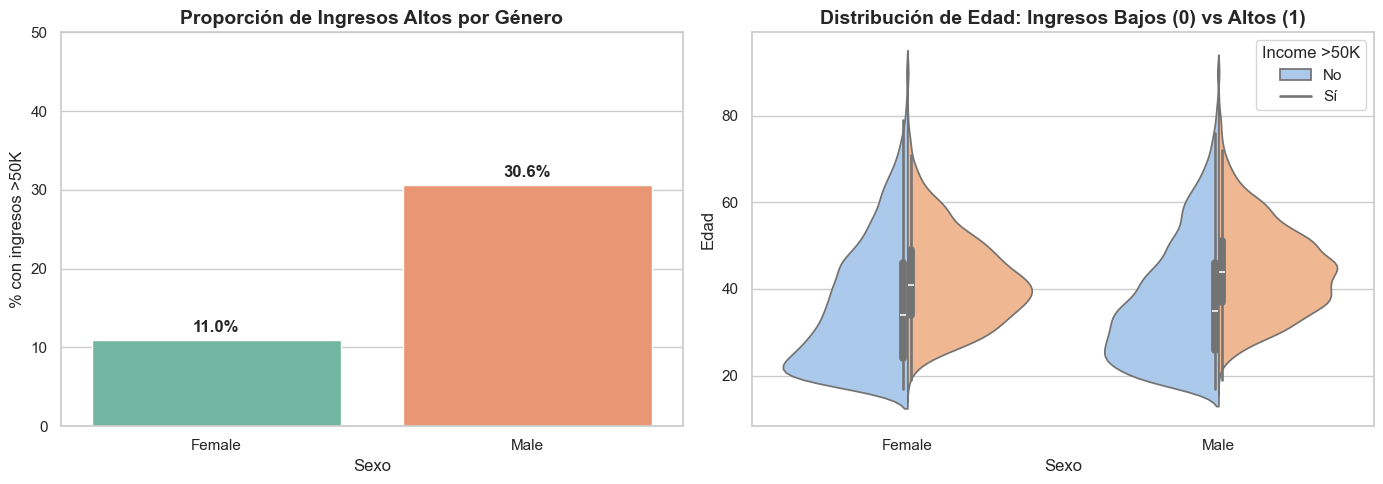

üí° INSIGHT 1: BRECHA DE G√âNERO

üìä Diferencia: 19.6 puntos porcentuales
üéØ Interpretaci√≥n: Las mujeres tienen menor acceso a ingresos altos
‚úÖ Acci√≥n: Programas de capacitaci√≥n y mentor√≠a enfocados en mujeres para sectores de alto ingreso


In [98]:
# Visualizaci√≥n 1: Brecha de g√©nero
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1.1 Proporci√≥n de ingresos >50K por sexo
gender_income = df.groupby('sex')['income_bin'].agg(['mean', 'count']).reset_index()
gender_income['mean'] = gender_income['mean'] * 100

sns.barplot(data=gender_income, x='sex', y='mean', palette='Set2', ax=axes[0])
axes[0].set_ylabel('% con ingresos >50K', fontsize=12)
axes[0].set_xlabel('Sexo', fontsize=12)
axes[0].set_title('Proporci√≥n de Ingresos Altos por G√©nero', fontsize=14, fontweight='bold')
axes[0].set_ylim(0, 50)

# A√±adir valores en barras
for i, row in gender_income.iterrows():
    axes[0].text(i, row['mean'] + 1, f"{row['mean']:.1f}%", 
                ha='center', fontweight='bold')

# 1.2 Distribuci√≥n de edad por sexo e ingresos
sns.violinplot(data=df, x='sex', y='age', hue='income_bin', 
               split=True, palette='pastel', ax=axes[1])
axes[1].set_ylabel('Edad', fontsize=12)
axes[1].set_xlabel('Sexo', fontsize=12)
axes[1].set_title('Distribuci√≥n de Edad: Ingresos Bajos (0) vs Altos (1)', fontsize=14, fontweight='bold')
axes[1].legend(title='Income >50K', labels=['No', 'S√≠'])

plt.tight_layout()
plt.show()

# üí° Insight
print("=" * 60)
print("üí° INSIGHT 1: BRECHA DE G√âNERO")
print("=" * 60)
diff = gender_income.set_index('sex')['mean'].diff().iloc[-1]
print(f"\nüìä Diferencia: {abs(diff):.1f} puntos porcentuales")
print(f"üéØ Interpretaci√≥n: {'Las mujeres tienen menor acceso a ingresos altos' if diff > 0 else 'Los hombres tienen menor acceso'}")
print(f"‚úÖ Acci√≥n: Programas de capacitaci√≥n y mentor√≠a enfocados en mujeres para sectores de alto ingreso")
print("=" * 60)

### üéì Visualizaci√≥n 2: El Poder (Real) de la Educaci√≥n

**Historia**: Se dice que "la educaci√≥n es el camino al √©xito", pero ¬øcu√°nto impacta realmente en los ingresos? ¬øY es igual para todos?

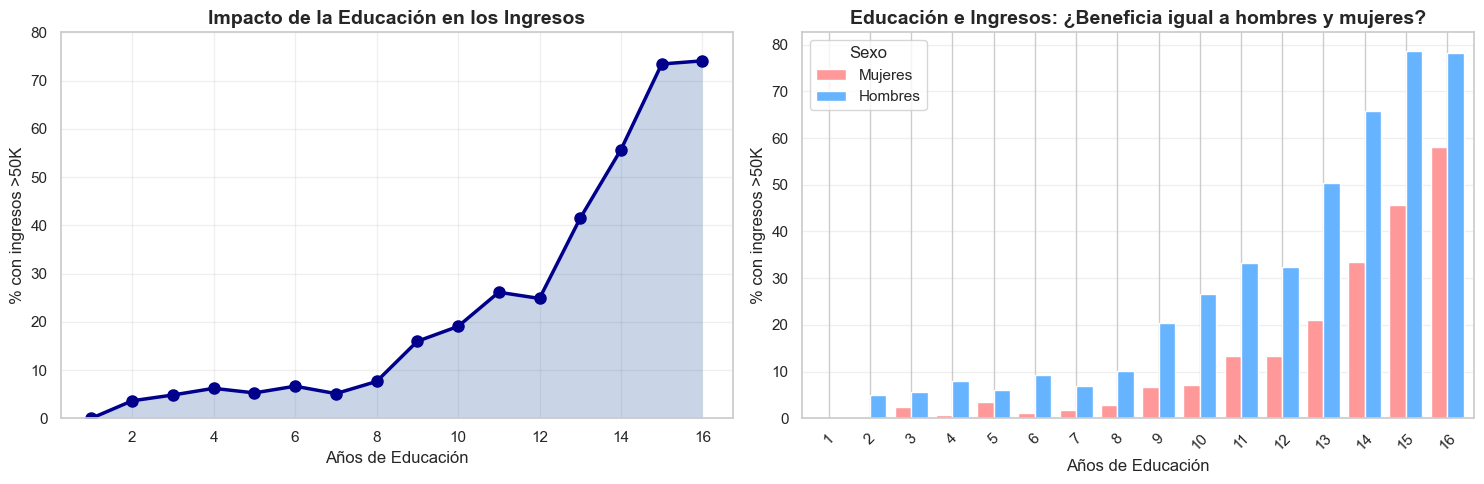

üí° INSIGHT 2: EDUCACI√ìN Y EQUIDAD

üìä Educaci√≥n b√°sica (‚â§10 a√±os): 15.0% con >50K
üìä Educaci√≥n superior (‚â•13 a√±os): 48.5% con >50K
üìà Impacto: +33.5 puntos porcentuales
‚ö†Ô∏è Pero: La brecha de g√©nero persiste incluso con educaci√≥n alta
‚úÖ Acci√≥n: Becas + acompa√±amiento laboral post-formaci√≥n para grupos vulnerables


In [99]:
# Visualizaci√≥n 2: Educaci√≥n e ingresos
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 2.1 Proporci√≥n de ingresos >50K por nivel educativo
edu_income = df.groupby('education_num')['income_bin'].mean().reset_index()
edu_income['income_bin'] = edu_income['income_bin'] * 100

axes[0].plot(edu_income['education_num'], edu_income['income_bin'], 
            marker='o', linewidth=2.5, markersize=8, color='darkblue')
axes[0].fill_between(edu_income['education_num'], edu_income['income_bin'], alpha=0.3)
axes[0].set_xlabel('A√±os de Educaci√≥n', fontsize=12)
axes[0].set_ylabel('% con ingresos >50K', fontsize=12)
axes[0].set_title('Impacto de la Educaci√≥n en los Ingresos', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(0, 80)

# 2.2 Educaci√≥n vs Ingresos: diferencias por g√©nero
edu_gender = df.groupby(['education_num', 'sex'])['income_bin'].mean().unstack() * 100

edu_gender.plot(kind='bar', ax=axes[1], color=['#ff9999', '#66b3ff'], width=0.8)
axes[1].set_xlabel('A√±os de Educaci√≥n', fontsize=12)
axes[1].set_ylabel('% con ingresos >50K', fontsize=12)
axes[1].set_title('Educaci√≥n e Ingresos: ¬øBeneficia igual a hombres y mujeres?', 
                 fontsize=14, fontweight='bold')
axes[1].legend(title='Sexo', labels=['Mujeres', 'Hombres'])
axes[1].set_xticklabels(edu_gender.index, rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# üí° Insight
print("=" * 60)
print("üí° INSIGHT 2: EDUCACI√ìN Y EQUIDAD")
print("=" * 60)
low_edu = df[df['education_num'] <= 10]['income_bin'].mean() * 100
high_edu = df[df['education_num'] >= 13]['income_bin'].mean() * 100
print(f"\nüìä Educaci√≥n b√°sica (‚â§10 a√±os): {low_edu:.1f}% con >50K")
print(f"üìä Educaci√≥n superior (‚â•13 a√±os): {high_edu:.1f}% con >50K")
print(f"üìà Impacto: +{high_edu - low_edu:.1f} puntos porcentuales")
print(f"‚ö†Ô∏è Pero: La brecha de g√©nero persiste incluso con educaci√≥n alta")
print(f"‚úÖ Acci√≥n: Becas + acompa√±amiento laboral post-formaci√≥n para grupos vulnerables")
print("=" * 60)

### üíº Visualizaci√≥n 3: Ocupaciones y Desigualdad

**Historia**: No todas las ocupaciones ofrecen las mismas oportunidades. ¬øQu√© sectores concentran la desigualdad?

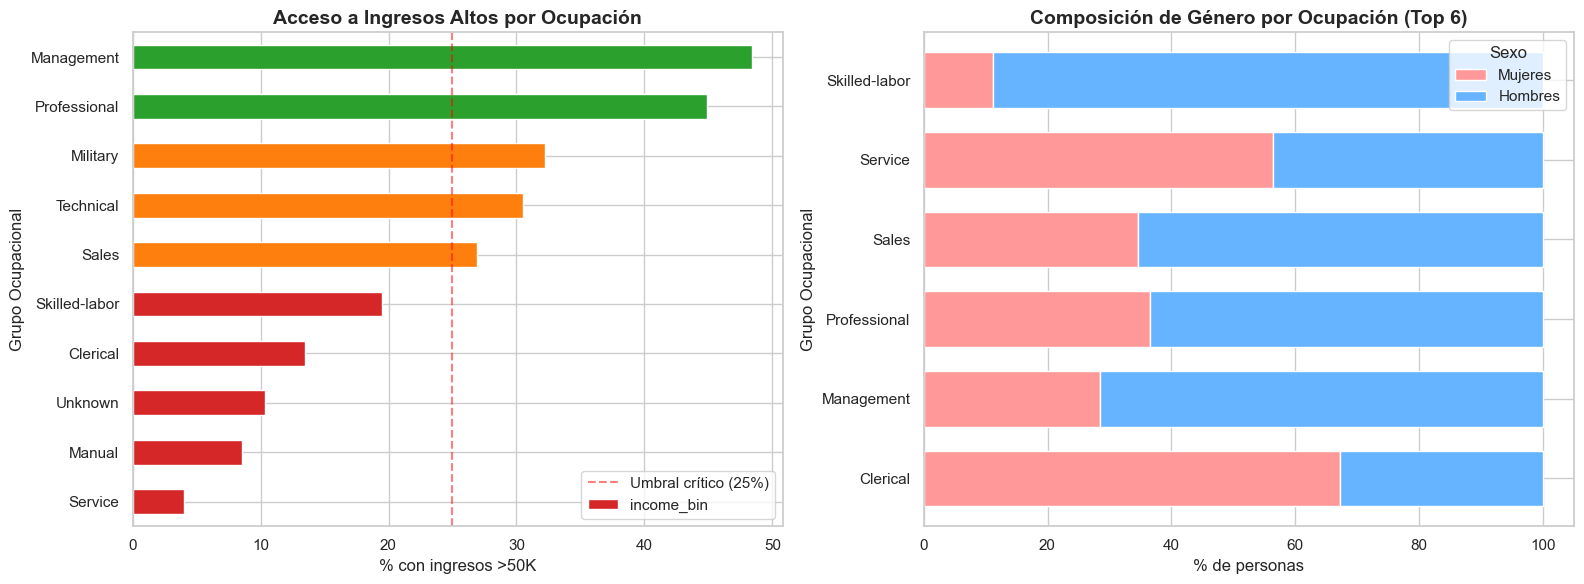

üí° INSIGHT 3: SEGREGACI√ìN OCUPACIONAL

üî¥ Ocupaciones de bajo acceso (<25%): Service, Manual, Unknown, Clerical, Skilled-labor
üü¢ Ocupaciones de alto acceso (>40%): Professional, Management

‚ö†Ô∏è Observaci√≥n: Sectores como 'Service' y 'Manual' concentran bajos ingresos
‚úÖ Acci√≥n: Upskilling dirigido + reconversi√≥n profesional hacia sectores t√©cnicos/profesionales


In [100]:
# Visualizaci√≥n 3: Ocupaciones
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 3.1 Proporci√≥n de ingresos >50K por grupo ocupacional
occ_income = df.groupby('occ_group').agg({
    'income_bin': 'mean',
    'occ_group': 'count'
}).rename(columns={'occ_group': 'count'})
occ_income['income_bin'] = occ_income['income_bin'] * 100
occ_income = occ_income.sort_values('income_bin', ascending=True)

colors = ['#d62728' if x < 25 else '#ff7f0e' if x < 35 else '#2ca02c' 
          for x in occ_income['income_bin']]

occ_income['income_bin'].plot(kind='barh', ax=axes[0], color=colors)
axes[0].set_xlabel('% con ingresos >50K', fontsize=12)
axes[0].set_ylabel('Grupo Ocupacional', fontsize=12)
axes[0].set_title('Acceso a Ingresos Altos por Ocupaci√≥n', fontsize=14, fontweight='bold')
axes[0].axvline(x=25, color='red', linestyle='--', alpha=0.5, label='Umbral cr√≠tico (25%)')
axes[0].legend()

# 3.2 Distribuci√≥n de g√©nero por ocupaci√≥n (top 6)
top_occ = df['occ_group'].value_counts().head(6).index
occ_gender = df[df['occ_group'].isin(top_occ)].groupby(['occ_group', 'sex']).size().unstack(fill_value=0)
occ_gender_pct = occ_gender.div(occ_gender.sum(axis=1), axis=0) * 100

occ_gender_pct.plot(kind='barh', stacked=True, ax=axes[1], 
                    color=['#ff9999', '#66b3ff'], width=0.7)
axes[1].set_xlabel('% de personas', fontsize=12)
axes[1].set_ylabel('Grupo Ocupacional', fontsize=12)
axes[1].set_title('Composici√≥n de G√©nero por Ocupaci√≥n (Top 6)', fontsize=14, fontweight='bold')
axes[1].legend(title='Sexo', labels=['Mujeres', 'Hombres'])

plt.tight_layout()
plt.show()

# üí° Insight
print("=" * 60)
print("üí° INSIGHT 3: SEGREGACI√ìN OCUPACIONAL")
print("=" * 60)
low_income_occ = occ_income[occ_income['income_bin'] < 25].index.tolist()
high_income_occ = occ_income[occ_income['income_bin'] > 40].index.tolist()
print(f"\nüî¥ Ocupaciones de bajo acceso (<25%): {', '.join(low_income_occ)}")
print(f"üü¢ Ocupaciones de alto acceso (>40%): {', '.join(high_income_occ)}")
print(f"\n‚ö†Ô∏è Observaci√≥n: Sectores como 'Service' y 'Manual' concentran bajos ingresos")
print(f"‚úÖ Acci√≥n: Upskilling dirigido + reconversi√≥n profesional hacia sectores t√©cnicos/profesionales")
print("=" * 60)

### ‚è∞ Visualizaci√≥n 4: La Trampa del Trabajo Intensivo

**Historia**: ¬øM√°s horas trabajadas = m√°s ingresos? No siempre. Veamos la relaci√≥n entre esfuerzo y recompensa.

C:\Users\usuario\AppData\Local\Temp\ipykernel_8196\615060451.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='income_label', y='hours_per_week',


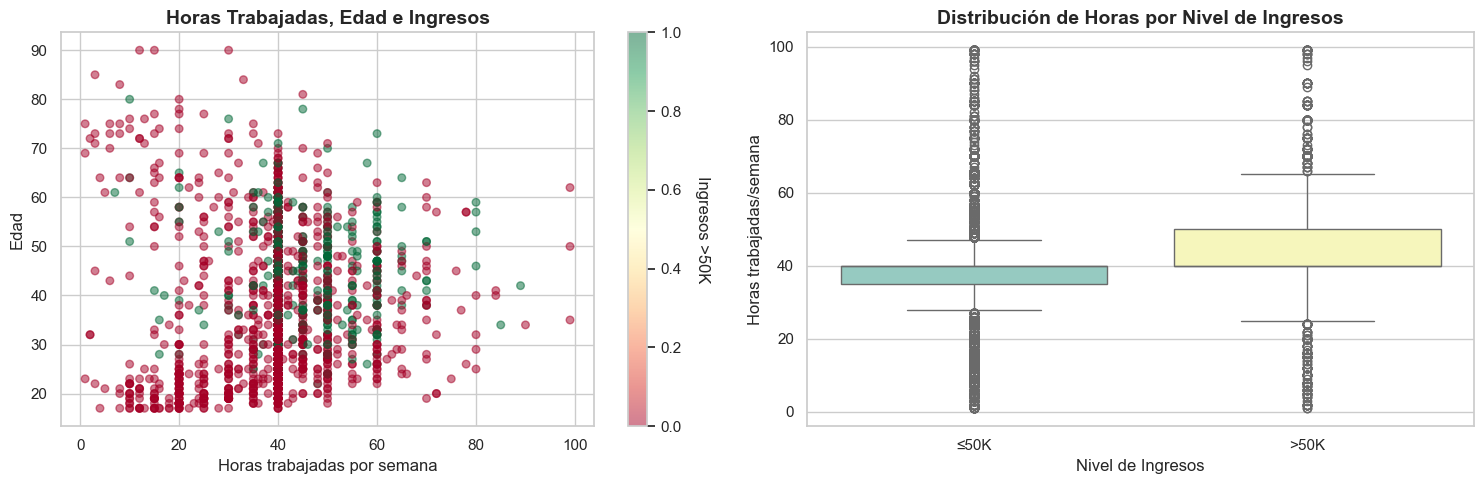

üí° INSIGHT 4: TRABAJO INTENSIVO ‚â† BUENOS INGRESOS

üìä Horas mediana (‚â§50K): 40h/semana
üìä Horas mediana (>50K): 40h/semana
‚ö†Ô∏è Paradoja: Mucha gente trabaja muchas horas pero gana poco
üéØ Causa probable: Tipo de trabajo (manual/servicio) m√°s que cantidad de horas
‚úÖ Acci√≥n: Formaci√≥n en habilidades de alto valor agregado, no solo 'trabajar m√°s'


In [101]:
# Visualizaci√≥n 4: Horas trabajadas vs ingresos
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 4.1 Scatter plot: horas vs ingresos (muestra)
sample_df = df.sample(min(2000, len(df)), random_state=42)
scatter = axes[0].scatter(sample_df['hours_per_week'], 
                         sample_df['age'],
                         c=sample_df['income_bin'], 
                         cmap='RdYlGn', 
                         alpha=0.5, 
                         s=30)
axes[0].set_xlabel('Horas trabajadas por semana', fontsize=12)
axes[0].set_ylabel('Edad', fontsize=12)
axes[0].set_title('Horas Trabajadas, Edad e Ingresos', fontsize=14, fontweight='bold')
cbar = plt.colorbar(scatter, ax=axes[0])
cbar.set_label('Ingresos >50K', rotation=270, labelpad=20)

# 4.2 Box plot: distribuci√≥n de horas por nivel de ingresos
df['income_label'] = df['income_bin'].map({0: '‚â§50K', 1: '>50K'})
sns.boxplot(data=df, x='income_label', y='hours_per_week', 
            palette='Set3', ax=axes[1])
axes[1].set_xlabel('Nivel de Ingresos', fontsize=12)
axes[1].set_ylabel('Horas trabajadas/semana', fontsize=12)
axes[1].set_title('Distribuci√≥n de Horas por Nivel de Ingresos', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# üí° Insight
print("=" * 60)
print("üí° INSIGHT 4: TRABAJO INTENSIVO ‚â† BUENOS INGRESOS")
print("=" * 60)
low_inc_hours = df[df['income_bin'] == 0]['hours_per_week'].median()
high_inc_hours = df[df['income_bin'] == 1]['hours_per_week'].median()
print(f"\nüìä Horas mediana (‚â§50K): {low_inc_hours:.0f}h/semana")
print(f"üìä Horas mediana (>50K): {high_inc_hours:.0f}h/semana")
print(f"‚ö†Ô∏è Paradoja: Mucha gente trabaja muchas horas pero gana poco")
print(f"üéØ Causa probable: Tipo de trabajo (manual/servicio) m√°s que cantidad de horas")
print(f"‚úÖ Acci√≥n: Formaci√≥n en habilidades de alto valor agregado, no solo 'trabajar m√°s'")
print("=" * 60)

### üéØ Visualizaci√≥n 5: El Impacto de los Datos Faltantes (Occupation Missing)

**Historia**: Las personas sin ocupaci√≥n registrada (desempleados, trabajo informal) son un grupo vulnerable. ¬øQu√© tan grande es este grupo?

C:\Users\usuario\AppData\Local\Temp\ipykernel_8196\3187735160.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_income.index, y=missing_income.values,


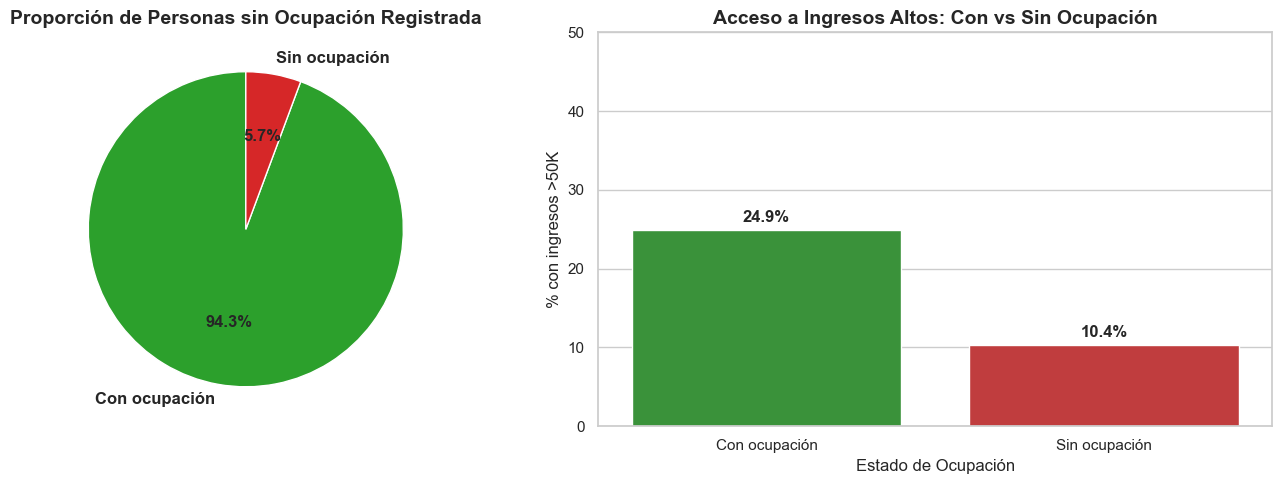

üí° INSIGHT 5: POBLACI√ìN VULNERABLE SIN OCUPACI√ìN

üìä Personas sin ocupaci√≥n registrada: 1,843 (5.7%)
üìä Tasa de >50K con ocupaci√≥n: 24.9%
üìä Tasa de >50K sin ocupaci√≥n: 10.4%
‚ö†Ô∏è Gap: 14.6 puntos porcentuales
üéØ Grupo prioritario: Desempleados, trabajo informal, transici√≥n laboral
‚úÖ Acci√≥n: Programas de inserci√≥n laboral + formaci√≥n t√©cnica acelerada


In [102]:
# Visualizaci√≥n 5: Impacto de occupation_missing
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 5.1 Proporci√≥n de casos sin ocupaci√≥n
missing_counts = df['occupation_missing'].value_counts()
colors_pie = ['#2ca02c', '#d62728']
axes[0].pie(missing_counts, labels=['Con ocupaci√≥n', 'Sin ocupaci√≥n'], 
           autopct='%1.1f%%', colors=colors_pie, startangle=90,
           textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[0].set_title('Proporci√≥n de Personas sin Ocupaci√≥n Registrada', 
                 fontsize=14, fontweight='bold')

# 5.2 Tasa de ingresos >50K: con vs sin ocupaci√≥n
missing_income = df.groupby('occupation_missing')['income_bin'].mean() * 100
missing_income.index = ['Con ocupaci√≥n', 'Sin ocupaci√≥n']

sns.barplot(x=missing_income.index, y=missing_income.values, 
           palette=['#2ca02c', '#d62728'], ax=axes[1])
axes[1].set_ylabel('% con ingresos >50K', fontsize=12)
axes[1].set_xlabel('Estado de Ocupaci√≥n', fontsize=12)
axes[1].set_title('Acceso a Ingresos Altos: Con vs Sin Ocupaci√≥n', 
                 fontsize=14, fontweight='bold')
axes[1].set_ylim(0, 50)

# A√±adir valores
for i, v in enumerate(missing_income.values):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# üí° Insight
print("=" * 60)
print("üí° INSIGHT 5: POBLACI√ìN VULNERABLE SIN OCUPACI√ìN")
print("=" * 60)
n_missing = df['occupation_missing'].sum()
pct_missing = (n_missing / len(df)) * 100
income_with = df[df['occupation_missing'] == 0]['income_bin'].mean() * 100
income_without = df[df['occupation_missing'] == 1]['income_bin'].mean() * 100
print(f"\nüìä Personas sin ocupaci√≥n registrada: {n_missing:,} ({pct_missing:.1f}%)")
print(f"üìä Tasa de >50K con ocupaci√≥n: {income_with:.1f}%")
print(f"üìä Tasa de >50K sin ocupaci√≥n: {income_without:.1f}%")
print(f"‚ö†Ô∏è Gap: {income_with - income_without:.1f} puntos porcentuales")
print(f"üéØ Grupo prioritario: Desempleados, trabajo informal, transici√≥n laboral")
print(f"‚úÖ Acci√≥n: Programas de inserci√≥n laboral + formaci√≥n t√©cnica acelerada")
print("=" * 60)

---

## üìù Resumen Ejecutivo: Hallazgos Clave para Inclusi√≥n

### üéØ Los 5 Insights Principales

1. **Brecha de G√©nero Persistente**: Las mujeres tienen significativamente menor acceso a ingresos altos, incluso con educaci√≥n equivalente
   
2. **La Educaci√≥n Importa (pero no es suficiente)**: Cada a√±o adicional de educaci√≥n aumenta las probabilidades, pero no elimina otras desigualdades

3. **Segregaci√≥n Ocupacional**: Sectores como Service y Manual concentran bajos ingresos; Professional y Management ofrecen mejores oportunidades

4. **Trabajo ‚â† Recompensa**: Muchas personas trabajan muchas horas pero permanecen en bajos ingresos (tipo de trabajo > cantidad de horas)

5. **Poblaci√≥n Vulnerable Sin Ocupaci√≥n**: ~6% sin ocupaci√≥n registrada tienen tasas dram√°ticamente bajas de acceso a buenos ingresos

### ‚úÖ Acciones Recomendadas

| Grupo Objetivo | Intervenci√≥n | Prioridad |
|----------------|--------------|-----------|
| **Mujeres en sectores de bajo ingreso** | Programas de upskilling + mentor√≠a en sectores t√©cnicos/profesionales | üî¥ ALTA |
| **Trabajadores manuales/servicio** | Reconversi√≥n profesional + certificaciones t√©cnicas | üî¥ ALTA |
| **Personas sin ocupaci√≥n formal** | Inserci√≥n laboral acelerada + formaci√≥n b√°sica | üî¥ ALTA |
| **J√≥venes con educaci√≥n b√°sica** | Becas para educaci√≥n superior + pr√°cticas pagadas | üü° MEDIA |
| **Personas 45+ en transici√≥n** | Formaci√≥n en habilidades digitales + networking | üü° MEDIA |

### üöÄ Pr√≥ximos Pasos

1. **Modelado Predictivo**: Entrenar modelo para identificar personas en riesgo de bajos ingresos
2. **Fairness Analysis**: Medir sesgos del modelo por g√©nero, edad y ocupaci√≥n
3. **Intervenciones Personalizadas**: Sistema de recomendaci√≥n de formaci√≥n seg√∫n perfil
4. **A/B Testing**: Probar efectividad de programas de inclusi√≥n con grupo control